
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_1.21
## ( *A20-24.h5* - Optimizer Functions - 1000 Epochs )
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 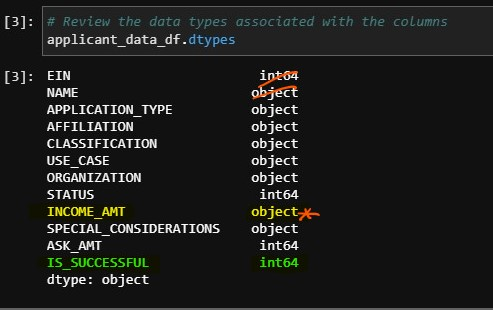

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 20+

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A20 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A20 =  (number_input_features + number_output_neurons_A20) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A20

57

In [21]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A20 =  (hidden_nodes_layer1_A20 + number_output_neurons_A20) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A20

29

In [22]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A20 =  (hidden_nodes_layer2_A20 + number_output_neurons_A20) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A20

15

In [23]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A20 =  (hidden_nodes_layer3_A20 + number_output_neurons_A20) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A20

8

In [24]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A20 =  (hidden_nodes_layer4_A20 + number_output_neurons_A20) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A20

4

In [25]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A20 =  (hidden_nodes_layer5_A20 + number_output_neurons_A20) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A20

2

In [26]:
# Create and Display the Sequential Model Instance 
# for Model A20
nn_A20 = Sequential() 

# Add the first hidden layer
nn_A20.add(Dense(units=hidden_nodes_layer1_A20, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A20.add(Dense(units=hidden_nodes_layer2_A20, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A20.add(Dense(units=hidden_nodes_layer3_A20, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A20.add(Dense(units=hidden_nodes_layer4_A20, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A20.add(Dense(units=hidden_nodes_layer5_A20, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A20.add(Dense(units=hidden_nodes_layer6_A20, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A20.add(Dense(units=number_output_neurons_A20, activation="sigmoid"))

# Display the Sequential model summary
nn_A20.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                6555      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [27]:
# Compile the Sequential model
nn_A20.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [28]:
# Fit the model using 50 epochs and the training data
fit_model_A20 = nn_A20.fit(X_train_scaled, y_train, validation_split=0.6, epochs=1000)

Epoch 1/1000
322/322 [==============================] - 1s 3ms/step - loss: 0.2297 - accuracy: 0.6502 - val_loss: 0.2064 - val_accuracy: 0.7294
Epoch 2/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2029 - accuracy: 0.7335 - val_loss: 0.1998 - val_accuracy: 0.7298
Epoch 3/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.7311 - val_loss: 0.1978 - val_accuracy: 0.7276
Epoch 4/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.1941 - accuracy: 0.7325 - val_loss: 0.1948 - val_accuracy: 0.7279
Epoch 5/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.1922 - accuracy: 0.7334 - val_loss: 0.1938 - val_accuracy: 0.7290
Epoch 6/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.1933 - accuracy: 0.7277 - val_loss: 0.1922 - val_accuracy: 0.7287
Epoch 7/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.1904 - accuracy: 0.7317 - val_loss: 0.1921 - val_accuracy:

In [29]:
print("Alternative Model 20 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A20.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
Loss: 0.19056975841522217, Accuracy: 0.7264139652252197


# Alternative Model 21+

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A21 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A21 =  (number_input_features + number_output_neurons_A21) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A21

57

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A21 =  (hidden_nodes_layer1_A21 + number_output_neurons_A21) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A21

29

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A21 =  (hidden_nodes_layer2_A21 + number_output_neurons_A21) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A21

15

In [35]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A21 =  (hidden_nodes_layer3_A21 + number_output_neurons_A21) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A21

8

In [36]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A21 =  (hidden_nodes_layer4_A21 + number_output_neurons_A21) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A21

4

In [37]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A21 =  (hidden_nodes_layer5_A21 + number_output_neurons_A21) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A21

2

In [38]:
# Create and Display the Sequential Model Instance 
# for Model A21
nn_A21 = Sequential() 

# Add the first hidden layer
nn_A21.add(Dense(units=hidden_nodes_layer1_A21, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A21.add(Dense(units=hidden_nodes_layer2_A21, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A21.add(Dense(units=hidden_nodes_layer3_A21, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A21.add(Dense(units=hidden_nodes_layer4_A21, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A21.add(Dense(units=hidden_nodes_layer5_A21, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A21.add(Dense(units=hidden_nodes_layer6_A21, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A21.add(Dense(units=number_output_neurons_A21, activation="sigmoid"))

# Display the Sequential model summary
nn_A21.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 57)                6555      
_________________________________________________________________
dense_8 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_9 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [39]:
# Compile the Sequential model
nn_A21.compile(loss="mse", optimizer="adadelta", metrics=["accuracy"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model_A21 = nn_A21.fit(X_train_scaled, y_train, validation_split=0.6, epochs=1000)

Epoch 1/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.5297 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 2/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.5346 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 3/1000
322/322 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5284 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 4/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.5259 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 5/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.5300 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 6/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.5392 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 7/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.5266 - val_loss: 0.2494 - val_accuracy:

In [41]:
print("Alternative Model 21 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A21.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 6 Results
Loss: 0.21291719377040863, Accuracy: 0.7204664945602417


# Alternative Model 22+

In [42]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [43]:
# Define the number of neurons in the output layer
number_output_neurons_A22 = 1

In [44]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A22 =  (number_input_features + number_output_neurons_A22) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A22

57

In [45]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A22 =  (hidden_nodes_layer1_A22 + number_output_neurons_A22) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A22

29

In [46]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A22 =  (hidden_nodes_layer2_A22 + number_output_neurons_A22) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A22

15

In [47]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A22 =  (hidden_nodes_layer3_A22 + number_output_neurons_A22) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A22

8

In [48]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A22 =  (hidden_nodes_layer4_A22 + number_output_neurons_A22) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A22

4

In [49]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A22 =  (hidden_nodes_layer5_A22 + number_output_neurons_A22) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A22

2

In [50]:
# Create and Display the Sequential Model Instance 
# for Model A22
nn_A22 = Sequential() 

# Add the first hidden layer
nn_A22.add(Dense(units=hidden_nodes_layer1_A22, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A22.add(Dense(units=hidden_nodes_layer2_A22, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A22.add(Dense(units=hidden_nodes_layer3_A22, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A22.add(Dense(units=hidden_nodes_layer4_A22, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A22.add(Dense(units=hidden_nodes_layer5_A22, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A22.add(Dense(units=hidden_nodes_layer6_A22, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A22.add(Dense(units=number_output_neurons_A22, activation="sigmoid"))

# Display the Sequential model summary
nn_A22.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_15 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [51]:
# Compile the Sequential model
nn_A22.compile(loss="mse", optimizer="rmsprop", metrics=["accuracy"])

In [52]:
# Fit the model using 50 epochs and the training data
fit_model_A22 = nn_A22.fit(X_train_scaled, y_train, validation_split=0.6, epochs=1000)

Epoch 1/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2299 - accuracy: 0.6277 - val_loss: 0.2090 - val_accuracy: 0.7204
Epoch 2/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2085 - accuracy: 0.7178 - val_loss: 0.2016 - val_accuracy: 0.7270
Epoch 3/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.7301 - val_loss: 0.1992 - val_accuracy: 0.7263
Epoch 4/1000
322/322 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.7214 - val_loss: 0.1949 - val_accuracy: 0.7277
Epoch 5/1000
322/322 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.7248 - val_loss: 0.1936 - val_accuracy: 0.7282
Epoch 6/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.1917 - accuracy: 0.7328 - val_loss: 0.1932 - val_accuracy: 0.7293
Epoch 7/1000
322/322 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.7306 - val_loss: 0.1920 - val_accuracy:

In [53]:
print("Alternative Model 22 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A22.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 7 Results
Loss: 0.1975753903388977, Accuracy: 0.7243148684501648


# Alternative Model 23+

In [54]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [55]:
# Define the number of neurons in the output layer
number_output_neurons_A23 = 1

In [56]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A23 =  (number_input_features + number_output_neurons_A23) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A23

57

In [57]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A23 =  (hidden_nodes_layer1_A23 + number_output_neurons_A23) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A23

29

In [58]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A23 =  (hidden_nodes_layer2_A23 + number_output_neurons_A23) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A23

15

In [59]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A23 =  (hidden_nodes_layer3_A23 + number_output_neurons_A23) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A23

8

In [60]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A23 =  (hidden_nodes_layer4_A23 + number_output_neurons_A23) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A23

4

In [61]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A23 =  (hidden_nodes_layer5_A23 + number_output_neurons_A23) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A23

2

In [62]:
# Create and Display the Sequential Model Instance 
# for Model A23
nn_A23 = Sequential() 

# Add the first hidden layer
nn_A23.add(Dense(units=hidden_nodes_layer1_A23, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A23.add(Dense(units=hidden_nodes_layer2_A23, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A23.add(Dense(units=hidden_nodes_layer3_A23, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A23.add(Dense(units=hidden_nodes_layer4_A23, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A23.add(Dense(units=hidden_nodes_layer5_A23, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A23.add(Dense(units=hidden_nodes_layer6_A23, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A23.add(Dense(units=number_output_neurons_A23, activation="sigmoid"))

# Display the Sequential model summary
nn_A23.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_22 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [63]:
# Compile the Sequential model
nn_A23.compile(loss="mse", optimizer="adagrad", metrics=["accuracy"])

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A23 = nn_A23.fit(X_train_scaled, y_train, validation_split=0.6, epochs=1000)

Epoch 1/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.5198 - val_loss: 0.2494 - val_accuracy: 0.5347
Epoch 2/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.5430 - val_loss: 0.2492 - val_accuracy: 0.5347
Epoch 3/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2490 - accuracy: 0.5302 - val_loss: 0.2491 - val_accuracy: 0.5347
Epoch 4/1000
322/322 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.5274 - val_loss: 0.2489 - val_accuracy: 0.5347
Epoch 5/1000
322/322 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.5386 - val_loss: 0.2488 - val_accuracy: 0.5347
Epoch 6/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2487 - accuracy: 0.5309 - val_loss: 0.2486 - val_accuracy: 0.5347
Epoch 7/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.5349 - val_loss: 0.2485 - val_accuracy:

In [65]:
print("Alternative Model 23 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A23.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 8 Results
Loss: 0.19754020869731903, Accuracy: 0.7290962338447571


# Alternative Model 24+

In [66]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [67]:
# Define the number of neurons in the output layer
number_output_neurons_A24 = 1

In [68]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A24 =  (number_input_features + number_output_neurons_A24) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A24

57

In [69]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A24 =  (hidden_nodes_layer1_A24 + number_output_neurons_A24) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A24

29

In [70]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A24 =  (hidden_nodes_layer2_A24 + number_output_neurons_A24) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A24

15

In [71]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A24 =  (hidden_nodes_layer3_A24 + number_output_neurons_A24) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A24

8

In [72]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A24 =  (hidden_nodes_layer4_A24 + number_output_neurons_A24) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A24

4

In [73]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A24 =  (hidden_nodes_layer5_A24 + number_output_neurons_A24) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A24

2

In [74]:
# Create and Display the Sequential Model Instance 
# for Model A24
nn_A24 = Sequential() 

# Add the first hidden layer
nn_A24.add(Dense(units=hidden_nodes_layer1_A24, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A24.add(Dense(units=hidden_nodes_layer2_A24, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A24.add(Dense(units=hidden_nodes_layer3_A24, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A24.add(Dense(units=hidden_nodes_layer4_A24, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A24.add(Dense(units=hidden_nodes_layer5_A24, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A24.add(Dense(units=hidden_nodes_layer6_A24, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A24.add(Dense(units=number_output_neurons_A24, activation="sigmoid"))

# Display the Sequential model summary
nn_A24.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_29 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_30 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [75]:
# Compile the Sequential model
nn_A24.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

In [76]:
# Fit the model using 50 epochs and the training data
fit_model_A24 = nn_A24.fit(X_train_scaled, y_train, validation_split=0.6, epochs=1000)

Epoch 1/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2509 - accuracy: 0.4952 - val_loss: 0.2498 - val_accuracy: 0.5191
Epoch 2/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2498 - accuracy: 0.5169 - val_loss: 0.2492 - val_accuracy: 0.5318
Epoch 3/1000
322/322 [==============================] - 1s 2ms/step - loss: 0.2489 - accuracy: 0.5324 - val_loss: 0.2488 - val_accuracy: 0.5326
Epoch 4/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.5334 - val_loss: 0.2486 - val_accuracy: 0.5328
Epoch 5/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.5292 - val_loss: 0.2480 - val_accuracy: 0.5339
Epoch 6/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.5336 - val_loss: 0.2474 - val_accuracy: 0.5342
Epoch 7/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.5396 - val_loss: 0.2465 - val_accuracy:

In [77]:
print("Alternative Model 24 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A24.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 9 Results
Loss: 0.18881872296333313, Accuracy: 0.7272303104400635


---
---

### Step 2: After completing your models, display the accuracy scores achieved by each model, and compare the results.

In [78]:
print("Alternative Model 20 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A20.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
Loss: 0.19056975841522217, Accuracy: 0.7264139652252197


In [79]:
print("Alternative Model 21 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A21.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 6 Results
Loss: 0.21291719377040863, Accuracy: 0.7204664945602417


In [80]:
print("Alternative Model 22 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A22.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 7 Results
Loss: 0.1975753903388977, Accuracy: 0.7243148684501648


In [81]:
print("Alternative Model 23 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A23.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 8 Results
Loss: 0.19754020869731903, Accuracy: 0.7290962338447571


In [82]:
print("Alternative Model 24 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A24.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 9 Results
Loss: 0.18881872296333313, Accuracy: 0.7272303104400635


### Step 2(b): Plot and Compare the Results of each Alternative Model

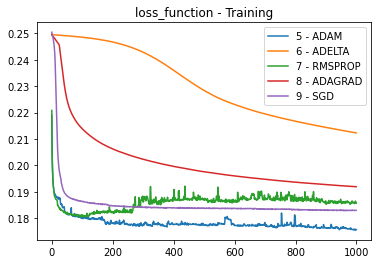

In [83]:
# Day 14-2 cell [62]
plt.plot(fit_model_A20.history["loss"])
plt.plot(fit_model_A21.history["loss"])
plt.plot(fit_model_A22.history["loss"])
plt.plot(fit_model_A23.history["loss"])
plt.plot(fit_model_A24.history["loss"])

plt.title("loss_function - Training")
plt.legend(["5 - ADAM",
            "6 - ADELTA",
            "7 - RMSPROP",
            "8 - ADAGRAD",
            "9 - SGD"
           ])
plt.show()

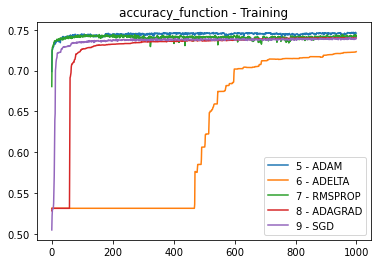

In [84]:
# Day 14-2 cell [62]
plt.plot(fit_model_A20.history["accuracy"])
plt.plot(fit_model_A21.history["accuracy"])
plt.plot(fit_model_A22.history["accuracy"])
plt.plot(fit_model_A23.history["accuracy"])
plt.plot(fit_model_A24.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["5 - ADAM",
            "6 - ADELTA",
            "7 - RMSPROP",
            "8 - ADAGRAD",
            "9 - SGD"
           ])
plt.show()

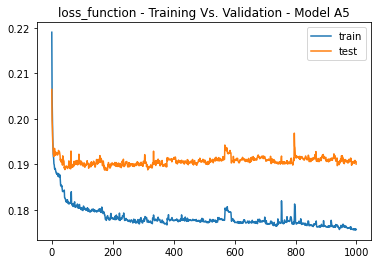

In [85]:
# Train vs test for deep net
plt.plot(fit_model_A20.history["loss"])
plt.plot(fit_model_A20.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A20")
plt.legend(["train", "test"])
plt.show()

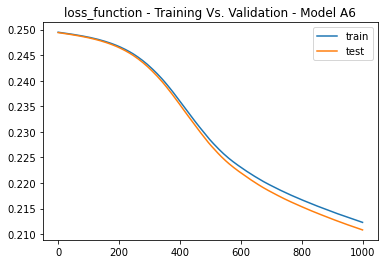

In [86]:
# Train vs test for deep net
plt.plot(fit_model_A21.history["loss"])
plt.plot(fit_model_A21.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A21")
plt.legend(["train", "test"])
plt.show()

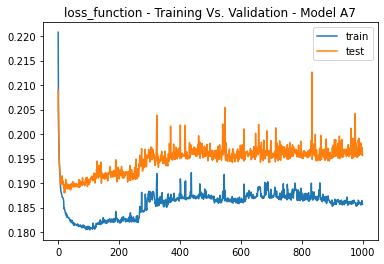

In [87]:
# Train vs test for deep net
plt.plot(fit_model_A22.history["loss"])
plt.plot(fit_model_A22.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A22")
plt.legend(["train", "test"])
plt.show()

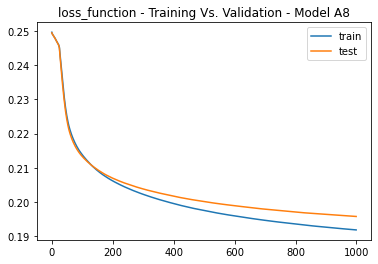

In [88]:
# Train vs test for deep net
plt.plot(fit_model_A23.history["loss"])
plt.plot(fit_model_A23.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A23")
plt.legend(["train", "test"])
plt.show()

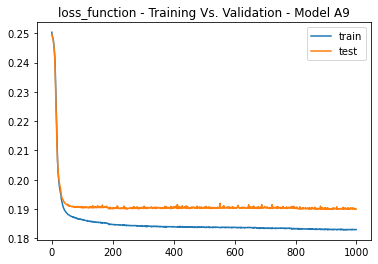

In [89]:
# Train vs test for deep net
plt.plot(fit_model_A24.history["loss"])
plt.plot(fit_model_A24.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A24")
plt.legend(["train", "test"])
plt.show()

# ================================

### Step 3: Save each of your alternative models as an HDF5 file.


In [90]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A20.h5")
# Export your model to a HDF5 file
nn_A20.save(file_path)

In [91]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A21.h5")
# Export your model to a HDF5 file
nn_A21.save(file_path)

In [92]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A22.h5")
# Export your model to a HDF5 file
nn_A22.save(file_path)

In [93]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A23.h5")
# Export your model to a HDF5 file
nn_A23.save(file_path)

In [94]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A24.h5")
# Export your model to a HDF5 file
nn_A24.save(file_path)